In [1]:
#Red Neuronal Convolucional aplicadas en
#CFAR10

import keras
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


Dimensiones de train_images: (50000, 32, 32, 3)
Dimensiones de train_labels: (50000, 1)
Dimensiones de test_images: (10000, 32, 32, 3)
Dimensiones de test_labels: (10000, 1)


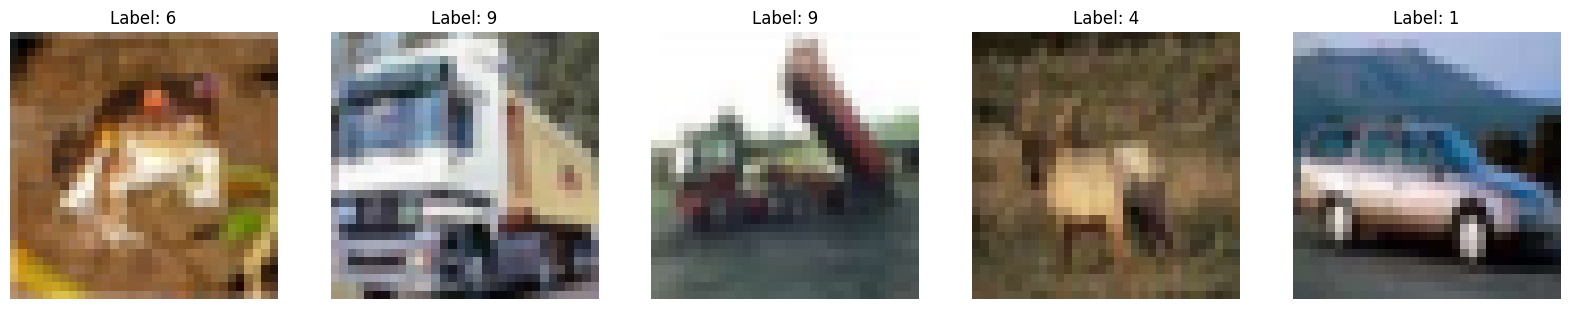

In [25]:
# Cargar las divisiones de entrenamiento y prueba del conjunto de datos CIFAR10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Verificar las dimensiones de los datos
print("Dimensiones de train_images:", training_images.shape)
print("Dimensiones de train_labels:", training_labels.shape)
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

# Mostrar algunas imágenes del conjunto de datos con mejor resolución
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(training_images[i], interpolation='none')
    axes[i].set_title(f"Label: {training_labels[i][0]}")
    axes[i].axis('off')
plt.show()

In [3]:
# Normalizar las imágenes
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertir etiquetas a formato one-hot
training_labels = keras.utils.to_categorical(training_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [4]:
#Construcción del modelo
#Construir el modelo de clasificación

# Definir el modelo
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [5]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.3999 - accuracy: 0.5010 - val_loss: 1.1594 - val_accuracy: 0.5892
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0434 - accuracy: 0.6323 - val_loss: 0.9816 - val_accuracy: 0.6580
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8988 - accuracy: 0.6868 - val_loss: 0.9211 - val_accuracy: 0.6836
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7895 - accuracy: 0.7275 - val_loss: 0.9811 - val_accuracy: 0.6602
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7030 - accuracy: 0.7539 - val_loss: 1.0230 - val_accuracy: 0.6719
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6247 - accuracy: 0.7825 - val_loss: 0.9245 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.5529 - accuracy: 0.8052 - val_loss: 0.9502 -

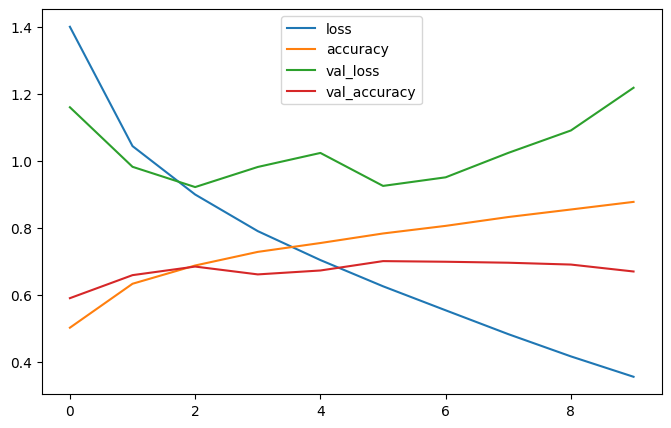

In [6]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [7]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1563/1563 [==============================] - 19s 12ms/step - loss: 0.3044 - accuracy: 0.8955
Pérdida en el conjunto de entrenamiento: 0.3043918013572693
Precisión en el conjunto de entrenamiento: 0.8955199718475342
313/313 [==============================] - 4s 11ms/step - loss: 1.2177 - accuracy: 0.6689
Pérdida en el conjunto de prueba: 1.217740774154663
Precisión en el conjunto de prueba: 0.6689000129699707


In [8]:
#Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')
#plt.imshow(test_images[index])
#plt.show()

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1/1 [==============================] - 0s 239ms/step
Classification:
 [[9.93911963e-05]
 [1.03913626e-04]
 [3.63809427e-09]
 [4.25337737e-10]
 [1.10622249e-11]
 [3.45637863e-12]
 [4.61080393e-13]
 [1.00785835e-13]
 [9.99790967e-01]
 [5.71735882e-06]]


In [9]:
#Después de realizar el entrenamiento vamos a ejecutar un código que permite
#Visualizar las convoluciones y Pooling

#Preparación de los datos
print(test_labels[:30])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [10]:
#Selección de imágenes de interés

FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


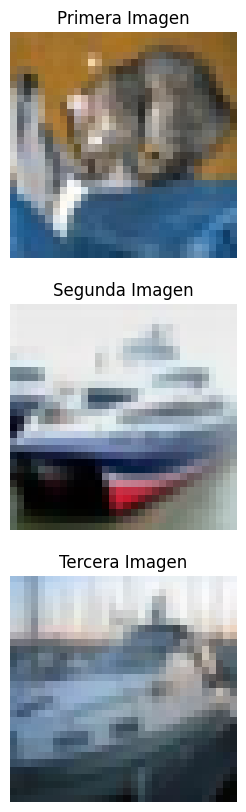

In [11]:
import matplotlib.pyplot as plt

# Definir los índices de las imágenes que se van a mostrar
FIRST_IMAGE = 0
SECOND_IMAGE = 1
THIRD_IMAGE = 2

# Visualización de imágenes
f, axarr = plt.subplots(3, 1, figsize=(10, 10))

# Mostrar la primera imagen
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[0].set_title('Primera Imagen')

# Mostrar la segunda imagen
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[1].set_title('Segunda Imagen')

# Mostrar la tercera imagen
axarr[2].imshow(test_images[THIRD_IMAGE])
axarr[2].set_title('Tercera Imagen')

# Quitar los ejes para una mejor visualización
for ax in axarr:
    ax.axis('off')

plt.show()

In [12]:
#Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)


1/1 [==============================] - 0s 23ms/step
Shape of activation 0: (1, 30, 30, 32)
Shape of activation 1: (1, 15, 15, 32)
Shape of activation 2: (1, 13, 13, 64)
Shape of activation 3: (1, 10816)
Shape of activation 4: (1, 64)
Shape of activation 5: (1, 10)


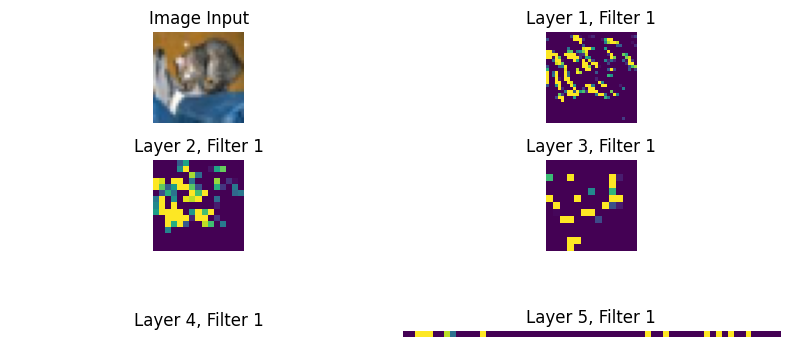

In [19]:
# Mostrar las activaciones para la primera imagen del conjunto de prueba
FIRST_IMAGE = 0
test_image = test_images[FIRST_IMAGE].reshape(1, 32, 32, 3)  # Ajustar el tamaño correctamente
activations = activation_model.predict(test_image)

# Imprimir las formas de las activaciones para depuración
for i, activation in enumerate(activations):
    print(f"Shape of activation {i}: {activation.shape}")

# Graficar las activaciones
fig, axarr = plt.subplots(3, 2, figsize=(8, 4))
axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
axarr[0, 0].axis('off')

# Ocultar el subplot extra
axarr[0, 1].axis('off')

for i in range(1, 6):
    # Tomar el primer filtro de la capa
    if len(activations[i-1].shape) == 4:
        f1 = activations[i-1][0, :, :, 0]
    else:
        f1 = activations[i-1]

    # Normalizar las activaciones para mejor visualización
    f1 = (f1 - f1.mean()) / f1.std()
    f1 = np.clip(f1, 0, 1)

    # Ajustar el índice de subplot
    row = (i) // 2
    col = (i) % 2

    axarr[row, col].set_title(f'Layer {i}, Filter 1')
    axarr[row, col].imshow(f1, cmap='viridis')
    axarr[row, col].axis('off')

# Ajustar el layout
plt.tight_layout()
plt.show()


Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 27ms/step


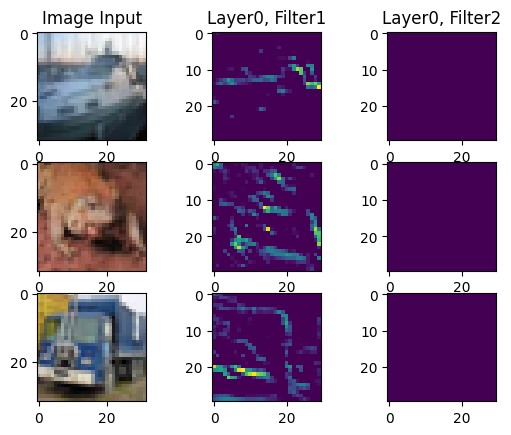

In [20]:
#seleccionando elementos etiquetados

FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0,1].set_title('Layer' + str(layer)+ ', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer' + str(layer)+ ', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])

In [2]:
# Cargar las divisiones de entrenamiento y prueba del conjunto de datos CIFAR10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Normalizar las imágenes
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertir etiquetas a formato one-hot
training_labels = keras.utils.to_categorical(training_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [4]:
#Construcción del modelo
#Construir el modelo de clasificación

# Definir el modelo
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5107 - accuracy: 0.4482 - val_loss: 1.2617 - val_accuracy: 0.5455
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1483 - accuracy: 0.5907 - val_loss: 1.0382 - val_accuracy: 0.6293
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0071 - accuracy: 0.6464 - val_loss: 1.0299 - val_accuracy: 0.6315
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9114 - accuracy: 0.6809 - val_loss: 0.9543 - val_accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8378 - accuracy: 0.7051 - val_loss: 0.9468 - val_accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7808 - accuracy: 0.7267 - val_loss: 0.8745 - val_accuracy: 0.7000
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7334 - accuracy: 0.7431 - val_loss: 0.8835 -

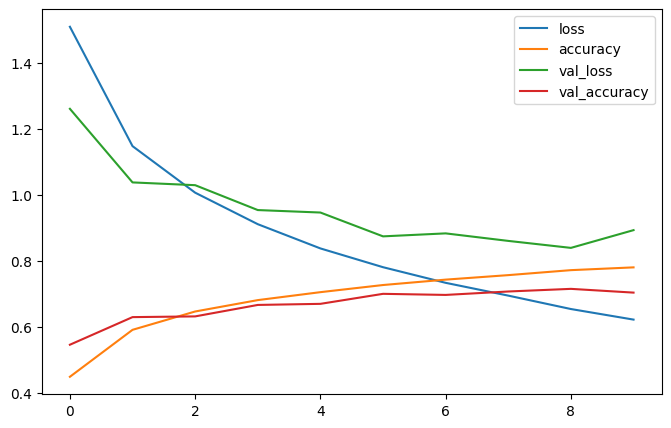

In [6]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

#Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [7]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1563/1563 [==============================] - 23s 15ms/step - loss: 0.5810 - accuracy: 0.7940
Pérdida en el conjunto de entrenamiento: 0.581041693687439
Precisión en el conjunto de entrenamiento: 0.7939800024032593
313/313 [==============================] - 4s 13ms/step - loss: 0.8934 - accuracy: 0.7037
Pérdida en el conjunto de prueba: 0.8933622241020203
Precisión en el conjunto de prueba: 0.7037000060081482


In [8]:
#Predicción
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')
#plt.imshow(test_images[index])
#plt.show()

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1/1 [==============================] - 0s 374ms/step
Classification:
 [[2.0640554e-02]
 [1.0123976e-03]
 [3.3706747e-06]
 [4.7885892e-06]
 [1.3764516e-06]
 [3.0126603e-08]
 [1.5129118e-08]
 [7.9991622e-07]
 [9.6882522e-01]
 [9.5113795e-03]]


In [9]:
#Después de realizar el entrenamiento vamos a ejecutar un código que permite
#Visualizar las convoluciones y Pooling

#Preparación de los datos
print(test_labels[:30])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


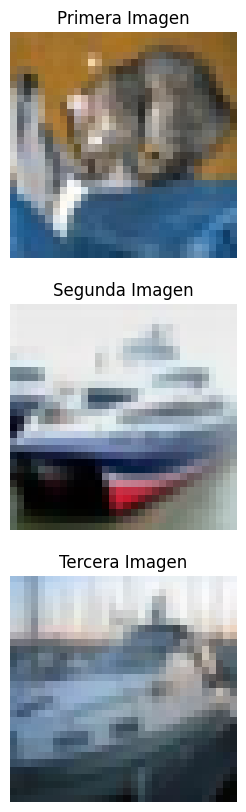

In [10]:
import matplotlib.pyplot as plt

# Definir los índices de las imágenes que se van a mostrar
FIRST_IMAGE = 0
SECOND_IMAGE = 1
THIRD_IMAGE = 2

# Visualización de imágenes
f, axarr = plt.subplots(3, 1, figsize=(10, 10))

# Mostrar la primera imagen
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[0].set_title('Primera Imagen')

# Mostrar la segunda imagen
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[1].set_title('Segunda Imagen')

# Mostrar la tercera imagen
axarr[2].imshow(test_images[THIRD_IMAGE])
axarr[2].set_title('Tercera Imagen')

# Quitar los ejes para una mejor visualización
for ax in axarr:
    ax.axis('off')

plt.show()

In [11]:
#Extracción de activaciones

layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 93ms/step
Shape of activation 0: (1, 30, 30, 32)
Shape of activation 1: (1, 15, 15, 32)
Shape of activation 2: (1, 13, 13, 64)
Shape of activation 3: (1, 6, 6, 64)
Shape of activation 4: (1, 4, 4, 64)
Shape of activation 5: (1, 1024)
Shape of activation 6: (1, 64)
Shape of activation 7: (1, 10)


<ipython-input-12-e19117b78f30>:27: RuntimeWarning: invalid value encountered in divide
  f1 = (f1 - f1.mean()) / f1.std()


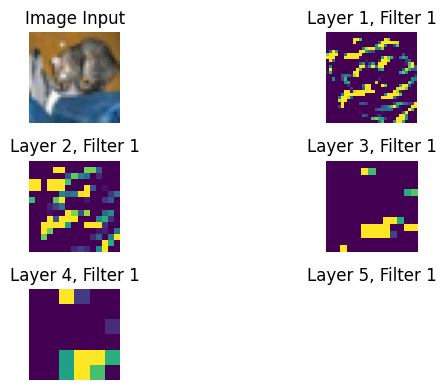

In [12]:
# Mostrar las activaciones para la primera imagen del conjunto de prueba
FIRST_IMAGE = 0
test_image = test_images[FIRST_IMAGE].reshape(1, 32, 32, 3)  # Ajustar el tamaño correctamente
activations = activation_model.predict(test_image)

# Imprimir las formas de las activaciones para depuración
for i, activation in enumerate(activations):
    print(f"Shape of activation {i}: {activation.shape}")

# Graficar las activaciones
fig, axarr = plt.subplots(3, 2, figsize=(8, 4))
axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
axarr[0, 0].axis('off')

# Ocultar el subplot extra
axarr[0, 1].axis('off')

for i in range(1, 6):
    # Tomar el primer filtro de la capa
    if len(activations[i-1].shape) == 4:
        f1 = activations[i-1][0, :, :, 0]
    else:
        f1 = activations[i-1]

    # Normalizar las activaciones para mejor visualización
    f1 = (f1 - f1.mean()) / f1.std()
    f1 = np.clip(f1, 0, 1)

    # Ajustar el índice de subplot
    row = (i) // 2
    col = (i) % 2

    axarr[row, col].set_title(f'Layer {i}, Filter 1')
    axarr[row, col].imshow(f1, cmap='viridis')
    axarr[row, col].axis('off')

# Ajustar el layout
plt.tight_layout()
plt.show()

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 46ms/step


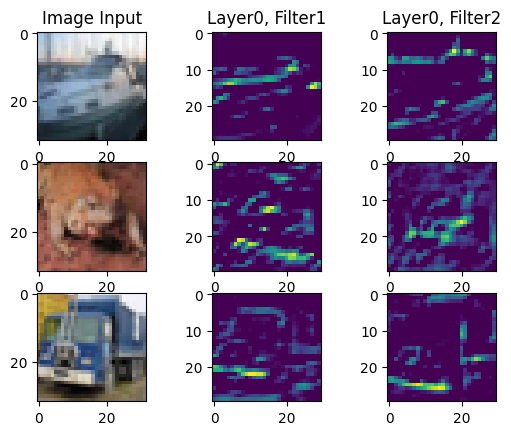

In [13]:
#seleccionando elementos etiquetados

FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0,1].set_title('Layer' + str(layer)+ ', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer' + str(layer)+ ', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f2= activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
f3= activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])